In [28]:
from pathlib import Path
from tqdm import tqdm

from plyfile import PlyData, PlyElement

import numpy as np
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt

In [33]:
experiment_name = 'dMaSIF_site_1layer_15A'
datafolder = Path(f'preds_1/{experiment_name}')
ply_data = Path('surface_data/raw/01-benchmark_surfaces/')
pdb_list = [p.stem[:-10] for p in datafolder.glob('*pred_emb1.vtk')]

In [34]:
pdb_list = pdb_list[:100]

In [35]:
# Extract mesh from ply data

n_meshpoints = []
n_predpoints = []

for pdb_id in tqdm(pdb_list):
    predpoints = np.load(datafolder/(pdb_id+'_predcoords.npy'))
    plydata = PlyData.read(ply_data/(pdb_id+'.ply'))
    meshpoints = plydata['face']['vertex_indices']
    # print(pdb_id, meshpoints.shape[0], predpoints.shape[0])
    n_meshpoints.append(meshpoints.shape[0])
    n_predpoints.append(predpoints.shape[0])

100%|██████████| 100/100 [00:13<00:00,  7.37it/s]


In [36]:
np.mean(n_meshpoints), np.mean(n_predpoints)

(7266.14, 7502.51)

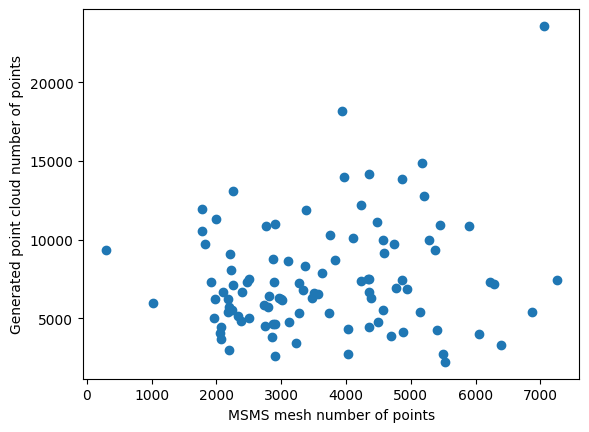

In [21]:
plt.scatter(n_meshpoints,n_predpoints);
plt.xlabel('MSMS mesh number of points');
plt.ylabel('Generated point cloud number of points');
#plt.savefig('figures/pointsperpoint.pdf')

In [ ]:
# This analysis suggests that _xyz is not _meshgrid
# _xyz, however, does have the same number of rows
# look at ply files

### Look at ply files

In [8]:
from plyfile import PlyData, PlyElement

In [9]:
plydata = PlyData.read(str('surface_data/raw/01-benchmark_surfaces/1A0G_B.ply'))

In [10]:
for n in plydata:
    print(n)

element vertex 5852
property float x
property float y
property float z
property float charge
property float hbond
property float hphob
property float iface
property float nx
property float ny
property float nz
element face 11704
property list uchar int vertex_indices


In [11]:
# interesting!


11704

In [15]:
len(plydata['face'].data)

11704

In [ ]:
plydata['face']['vertex_indices'][0]

### Use our example PDB

In [ ]:
pdb_id = '1A0G_B'

raw_data = Path('surface_data/raw/01-benchmark_surfaces_npy/')

predpoints = np.load(datafolder/(pdb_id+'_predcoords.npy'))
meshpoints = np.load(raw_data/(pdb_id+'_xyz.npy'))

In [ ]:
predpoints.shape

In [ ]:
meshpoints.shape